In [2]:
# Import all required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [3]:
# Load dataset 
df=pd.read_csv("aug_test.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [4]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [6]:
# Drop unnecessary column
df.drop(columns=["enrollee_id"],inplace=True)

In [7]:
df.isnull().sum()

city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [8]:
# Encoding Categorical columns
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [9]:
# Making Target column
df['score']=0

df['score']+=(df['relevent_experience']==1).astype(int)
df['score']+=(df['training_hours']>40).astype(int)
df['score']+=(df['company_size']<=2).astype(int)
df['score']+=(df['last_new_job']<=2).astype(int)
df['score']+=(df['experience']<=3).astype(int)

In [10]:
df['target']=(df['score']>=3).astype(int)
df.drop('score',axis=1,inplace=True)

In [11]:
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,69,0.827,1,0,0,0,5,19,7,6,0,21,0
1,5,0.920,0,0,2,0,5,15,8,5,0,98,0
2,55,0.624,1,1,2,1,6,20,8,5,5,15,0
3,22,0.827,1,0,2,2,5,2,0,5,0,39,1
4,5,0.920,1,0,2,0,5,21,3,5,4,72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,5,0.920,1,1,2,0,2,7,8,4,3,15,0
2125,25,0.897,1,0,2,2,5,9,8,6,1,30,0
2126,2,0.887,1,1,2,4,6,13,8,5,5,18,0
2127,4,0.804,1,0,0,1,6,17,1,4,0,84,1


In [12]:
# Checking Target column count of 1 and 0
df['target'].value_counts()

target
0    1565
1     564
Name: count, dtype: int64

In [13]:
# Feature and Target 
X=df.drop('target',axis=1)
y=df['target']

In [14]:
# Train-Test-Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
# Model
model=XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)
model.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [16]:
# Evaluation
y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy: 0.9984350547730829

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      0.99      1.00       183

    accuracy                           1.00       639
   macro avg       1.00      1.00      1.00       639
weighted avg       1.00      1.00      1.00       639


Confusion Matrix:
 [[456   0]
 [  1 182]]


In [17]:
# New Data
new_employee = pd.DataFrame([{
    'city': 5,
    'city_development_index': 0.85,
    'gender': 1,
    'relevent_experience': 1,
    'enrolled_university': 0,
    'education_level': 2,
    'major_discipline': 3,
    'experience': 5,
    'company_size': 4,
    'company_type': 1,
    'last_new_job': 1,
    'training_hours': 40
}])

prediction = model.predict(new_employee)[0]

if prediction == 1:
    print("Employee is likely to change job")
else:
    print("Employee is NOT likely to change job")


Employee is NOT likely to change job


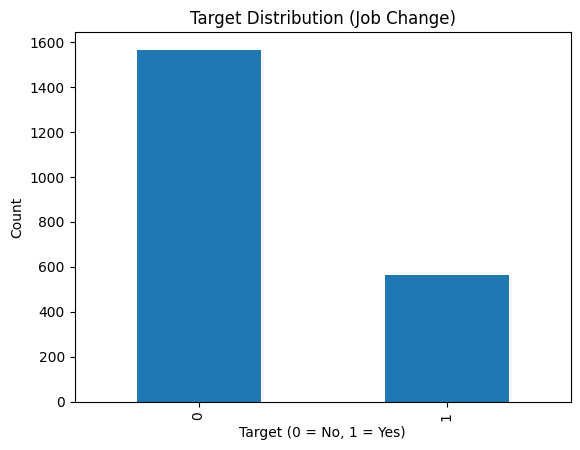

In [18]:
# Visualization
import matplotlib.pyplot as plt

df['target'].value_counts().plot(kind='bar')
plt.title("Target Distribution (Job Change)")
plt.xlabel("Target (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
